In [89]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from matplotlib import rc
import sympy as sym

In [90]:
T = np.array([-3,2])
R = np.array([2,-2])

def func(x):
    t = np.sqrt((x-T[0])**2+T[1]**2)+1.33*np.sqrt((x-R[0])**2+R[1]**2)
    return t

x = sym.Symbol('x',real=True)
funcImp = sym.sqrt((x-T[0])**2+T[1]**2)+1.33*sym.sqrt((x-R[0])**2+R[1]**2)
funcImp

dx = sym.diff(funcImp)
ddx = sym.diff(dx)

df = sym.lambdify([x],dx,'numpy')
ddf = sym.lambdify([x],ddx,'numpy')

dx

1.33*(x - 2)/sqrt((x - 2)**2 + 4) + (x + 3)/sqrt((x + 3)**2 + 4)

In [91]:
X = np.linspace(-5,5,1000)
Y = func(X)

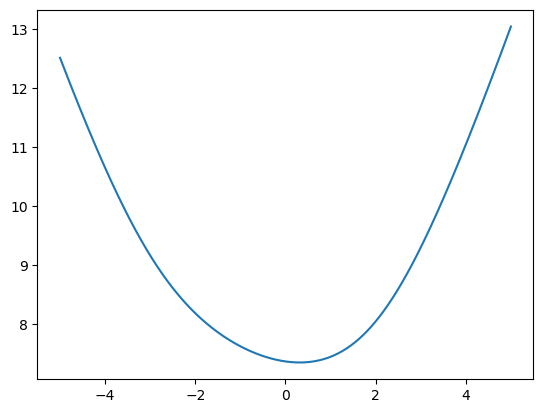

In [92]:
plt.plot(X,Y)

In [93]:
"""
Cualitativamente, podemos ver que el minimo se encuentra aproximadamente en 0.3
"""

'\nCualitativamente, podemos ver que el minimo se encuentra aproximadamente en 0.3\n'

In [94]:
def GetNewtonRaphson(f,df,xn,itmax = 100, precision=1e-5):
    
    error = 1
    it = 0
    
    while error > precision and it <= itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
            #print(error)
            
        except ZeroDivisionError:
            
            print('Division por cero')
            
        it += 1
        xn = xn1
    
    if it == itmax:
        False
    else:
        return xn
    
cordx = GetNewtonRaphson(df,ddf,1)

print(cordx)


cordPunto = [cordx,0]

0.31690575717257286


In [95]:
distTpunto = np.array([abs(T[0])+cordPunto[0],T[1]])
distRpunto = np.array([abs(R[0])-cordPunto[0],R[1]])

In [96]:
anguloIn = np.arctan(distTpunto[0]/distTpunto[1])
anguloRef = np.arctan(distRpunto[0]/distRpunto[1])
print(anguloIn,anguloRef)

1.0281946844603527 -0.6995662172277137


In [97]:
anguloRef = np.arcsin(1*np.sin(anguloIn)/1.33)
anguloRef

0.6995662172280103

In [98]:
print(abs(1/1.33),abs(np.sin(anguloRef)/np.sin(anguloIn)))

0.7518796992481203 0.7518796992481203


In [99]:
if round(1/1.33,6) == round(np.sin(anguloRef)/np.sin(anguloIn),6):
    print("Se cumple Snell :)")

Se cumple Snell :)


In [100]:
"""
Gracias al proceso computacional mostrado anteriormente, vemos que se cumple que la razón entre los indices de la refración
es igual a la razón de los senos del angulo de incidencia y el de refracción. De esta manera podemos ver que la ley de Snell
en efecto se cumple. Como nota adicional, podemos aclarar que los angulos dados están en radianes.
"""

'\nGracias al proceso computacional mostrado anteriormente, vemos que se cumple que la razón entre los indices de la refración\nes igual a la razón de los senos del angulo de incidencia y el de refracción. De esta manera podemos ver que la ley de Snell\nen efecto se cumple. Como nota adicional, podemos aclarar que los angulos dados están en radianes.\n'